<a href="https://colab.research.google.com/github/MaxwellPaparelli/Time_Series/blob/main/Yellow_September_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise de Suícidios Brasil e Mundo

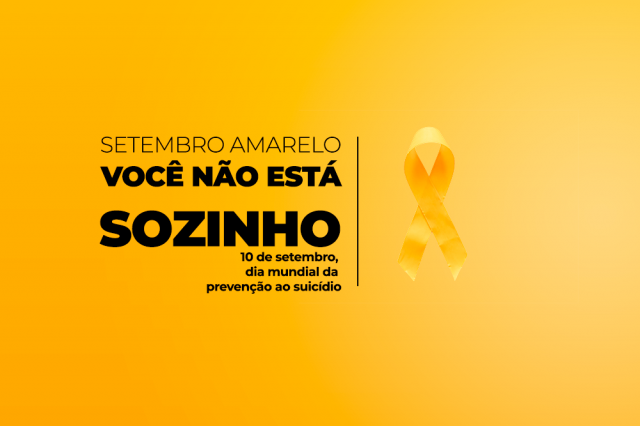

Objetivo deste notebook é analisar e gerar insghts a respeito das taxas de suícidios no Brasil e no mundo.

No Brasil chegamos a **13 mil suícidios por ano e 1 milhão no mundo** como podemos ver [neste site](https://www.setembroamarelo.com/).

Um número relevante que devemos saber é que **96% dos casos** estavam relacionados a transtornos mentais. Em primeiro lugar está a depressão, seguida do transtorno bipolar e abuso de substâncias.

Temos correlações entre [midia e suícidio](https://www.youtube.com/watch?v=gJBlY3opAVU), pois o como retratar uma noticia de suícidio ou até mesmo filmes e livros acabam influênciando o aumento deste indicador, com a O.M.S definindo como devem ser noticidado estes casos.

Vamos com a Ciência de Dados analisar estes dados e gerar algum insight de quais são os grupos que devemos ainda mais reforçar sobre a prevenção e ver como o Brasil encontra-se comparado ao Mundo em taxa de suícidios.

Dito isto vamos a nossa analise.
Primeiramente vamos importar nossas bibliotecas.

In [10]:
#importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()
%matplotlib inline

# Importar Data Frame

Este data frame consegui [neste site](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016) que é um compilado de 4 datasets com intuito de encontrar correlações e análise exploratória e também de ajudar no combate ao suícidio. 

In [11]:
# importar os dados
df = pd.read_csv("https://raw.githubusercontent.com/MaxwellPaparelli/Time_Series/main/suicide_rates.csv")

# Analise Exploratória e Insigths

Primeiro vamos verificar o nosso data frame de forma geral, verificando as primeiras linhas de dados e quantas linhas e colunas temos.

In [12]:
#printando data frame e quantidade de linhas e colunas
print("Shape do data frame, linhas e colunas - ", df.shape)
df.head()

Shape do data frame, linhas e colunas -  (27820, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Podemos tirar daqui alguns tipos de analises que iremos fazer, no caso, vamos comparar os suícidios entre Brasil e Mundo para ver o comportamento. Para isso iremos separar os dados do Brasil em outro data frame para realizar as comparações.

In [13]:
#Separar dados do Brasil para comparação
df_brasil = df[df.country == "Brazil"].copy()

#printando o data frame e quantidade de linhas e coluna
print("Shape do data frame somente com dados do brasil - ", df_brasil.shape)
df_brasil.head()

Shape do data frame somente com dados do brasil -  (372, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


Feito isso, iremos gerar o mapa de correlações para verificar o quais variaveis se correlacionam. Podemos deixar aqui como hipotese de que se o IDH ou PIB aumenta, o número de suícidio também aumenta, baseando-se naquele senso comum relacionado a que dinheiro pode não trazer felicidade ou que o crescemento financeiro pode levar ao sentimento de solidão e quem sabe ao ponto extremo que seria o suícidio.

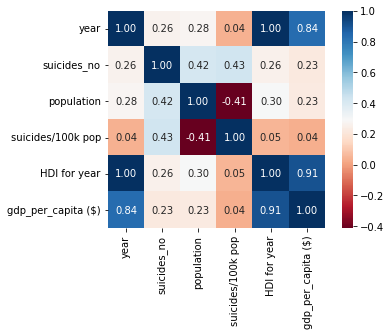

In [14]:
# plotar heatmap brasil, para ver correlações
corr = df_brasil.corr()
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Aqui podemos ver que não temos correlações entre eles, contrariando a nossa hipotese e ao senso comum informado anteriormente.

Em relação ao IDH, há muitos valores ausentes nas células, o que pode dar uma interpretação incorreta ou com viés.

Vale a pena ver como se comparta as váriaveis com o data frame com os dados do mundo todo.

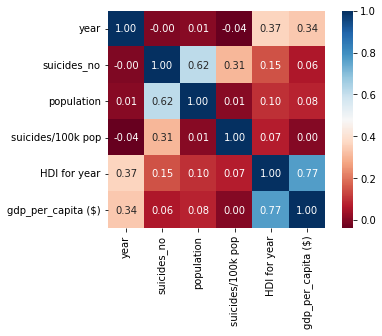

In [15]:
# plotar heatmap mundo, para ver correlações
corr = df.corr()
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Aqui plotei as correlações com os dados do mundo, podemos ver que se comportam da mesma forma, mas houve um aumento em relação entre às váriaveis "population" e "suicides_no", faz até sentido, pois quando maior a população de um país, maior é o número de suícidios, mas não que a causa do suícidio seja o aumento da população. 

## Plotar gráficos para Insights

Vamos primeiro separar as taxas de suícidio no brasil e mundo para compara-los. Irei retirar os dados do ano de 2016, pois há países que não há informação neste ano.

In [16]:
#fazer as medias do mundo e do Brasil em suicidios/100k
years = df_brasil.year.unique()#colocar em uma váriavel o eixo X
suicides_brasil_mean  = df_brasil.groupby('year')['suicides/100k pop'].mean()
suicides_world_mean = df.groupby('year')['suicides/100k pop'].mean()

#Dropar ano 2016 para todos, pois temos alguns dados que não estão preenchidos neste ano
suicides_world_mean.drop(2016, inplace=True)


Aqui vamos de fato plotar os números do Brasil primeiro e analisar.

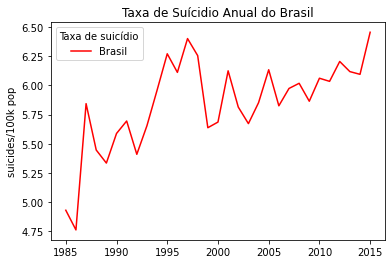

In [17]:
#Plotando Gráfico do Brasil
ax = sns.lineplot(x=years, y=suicides_brasil_mean, label="Brasil", color="red")
plt.legend(title="Taxa de suicídio")
plt.title("Taxa de Suícidio Anual do Brasil")
plt.show()

Podemos ver uma ascendência muito grande, depois um declinio por volta dos anos 2000, faz sentido se correlacionarmos com o [surgimento do movimento setembro amarelo](https://www.tjdft.jus.br/informacoes/programas-projetos-e-acoes/pro-vida/dicas-de-saude/pilulas-de-saude/setembro-amarelo-mes-da-prevencao-do-suicidio) mas logo volta a ter subidas e quedas, mas a tendência é ascendênte e isso é muito preocupante.

Agora vamos fazer uma comparação destes mesmos números, mas entre Brasil e Mundo.

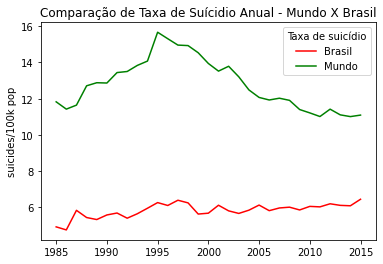

In [18]:
#Comparando Mundo X Brasil
ax = sns.lineplot(x=years, y=suicides_brasil_mean, label="Brasil", color="red")
ax = sns.lineplot(x=years, y=suicides_world_mean, label="Mundo", color="green")
plt.legend(title="Taxa de suicídio")
plt.title("Comparação de Taxa de Suícidio Anual - Mundo X Brasil")
plt.show()

Podemos ver que quando houve um pico no mundo, houve também no Brasil, e a queda se da praticamente no mesmo período, ou seja até então o Brasil está seguindo a tendência mundial, mas podemos ver que depois dessa queda a tedência mundial está tendendo a uma queda, mas Brasil não está seguindo a queda e sim subindo, isso é preocupante!

Agora, vamos pegar os dados de ano, quantidade de suícidios e faixa de idade, para vermos o comportamento durante os anos, para sabermos quais faixas de idade tendem cometer este ato no Brasil e no Mundo. Aqui uma hipotese é que no Brasil seja a população jovem e no mundo a faixa mais idosa, até por que no Brasil temos mais jovens que idosos e em outros países seja ao contrário.

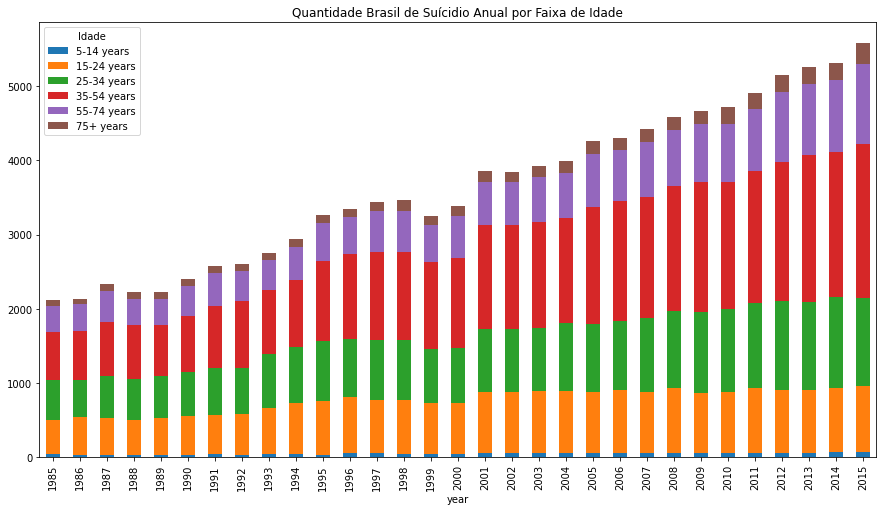

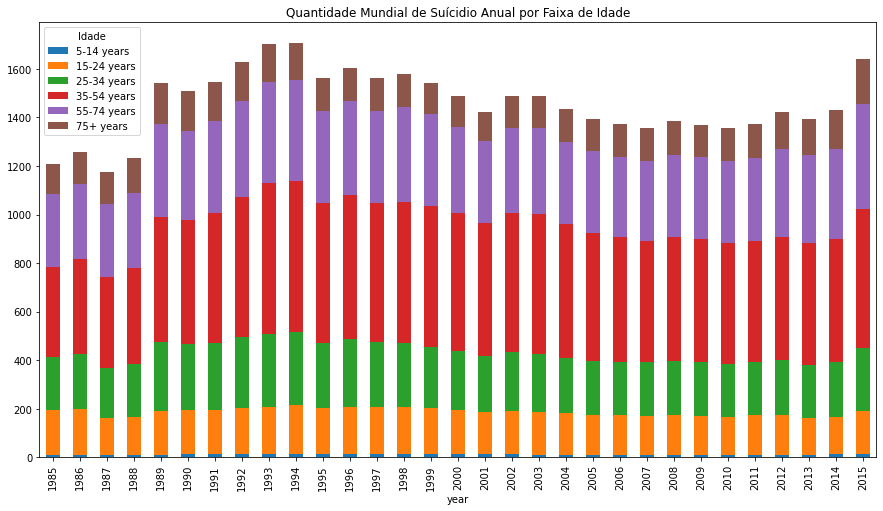

In [19]:
#Criar uma tabela dinâmica para separar número de suícidio e ano para plotar em um gráfico
#Iremos colocar a quantidade de suícidio por faíxa de idade e compará-los ano a ano
#iremos utilizar neste plot somente as inforamções do Brasil
table_br = pd.pivot_table(df_brasil, values="suicides_no", index=['year'], columns=['age'])

#Reordenar as tableas para deixar em ordem crescente de idade para ficar melhor a visualização
column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
table_br = table_br.reindex(column_order, axis=1)

#plotar gráfico
table_br.plot.bar(stacked=True,figsize=(15,8))
plt.legend(title="Idade")
plt.title("Quantidade Brasil de Suícidio Anual por Faixa de Idade")
plt.show()

#Iremos plotar o mesmo gráfico acima, mas com as informações do mundo para comparar
#comportamento com o Brasil
table_word = pd.pivot_table(df, values="suicides_no", index=['year'], columns=['age'])

#Removendo o ano 2016 da comparação pois no Brasil este dado está em branco
table_word.drop(2016, inplace=True)

#Reordenar as tableas para deixar em ordem crescente de idade para ficar melhor a visualização
column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
table_word = table_word.reindex(column_order, axis=1)

#plotar gráfico
table_word.plot.bar(stacked=True, figsize=(15,8))
plt.legend(title="Idade")
plt.title("Quantidade Mundial de Suícidio Anual por Faixa de Idade")
plt.show()

Podemos ver aqui que no Brasil a faixa mais afetada no Brasil é a 35 à 54 anos, seguido por 25 à 34 e depois 15 à 24, indicando assim quais faixas devemos ter um tratamento especial de concientização. Essa concientização deve ser feita não somente em redes de comunicação como a televisão, celular, por exemplo, mas também, pelo que os dados nos mostra pelas faixas, devemos concentrar nossos esforços em Escolas, Universidades e Trabalho e talvez não somente falar sobre, mas também abrir canais de ouvidoria com psicologos nestes locais ou por telefone.

Já mundialmente podemos ver ao contrario temos ainda sim nessas faixas 35 à 54 anos temos um número grande, mas podemos ver uma tendência de queda e um aumento na faixa de 55 à 74 anos, aqui a estratégia naturalmente seria outra, que poderia variar de acordo com a cultura de cada nação.

Agora vamos plotar a quantidade de suícidios por países.

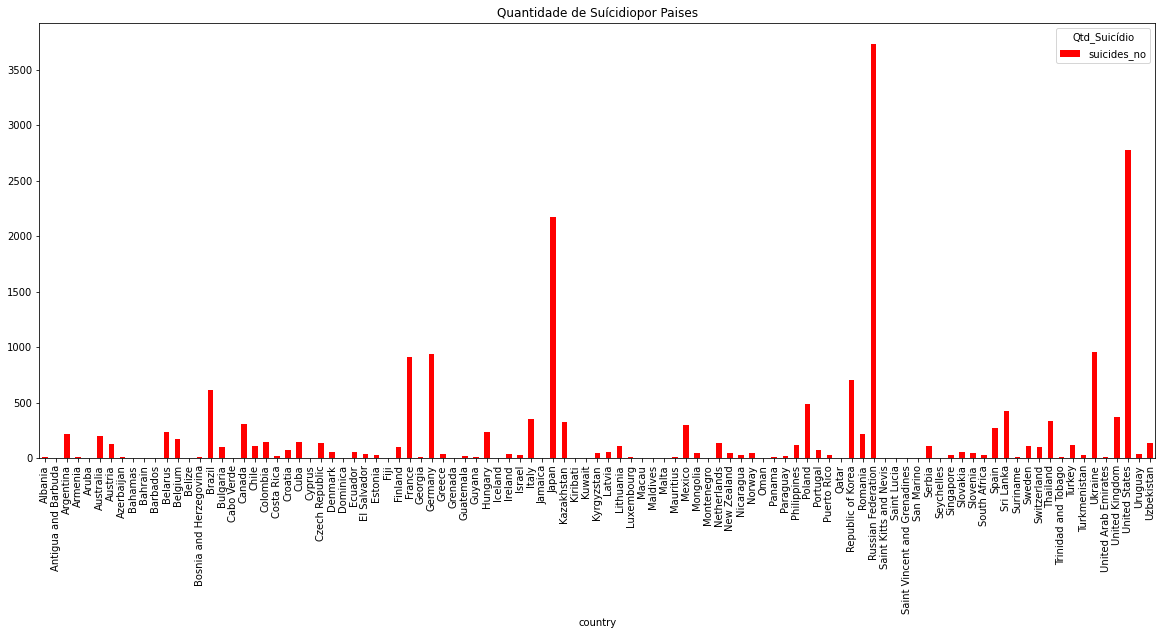

In [20]:
#Criar uma tabela dinâmica para separar número de suícidio e país para plotar em um gráfico
#Iremos comparar a quantidade de suícidios por país (acumulado)
table_score = pd.pivot_table(df, values="suicides_no", index=['country'])

#plotando o gráfico
table_score.plot.bar(stacked=True, figsize=(20,8), color = 'red')
plt.legend(title="Qtd_Suicídio")
plt.title("Quantidade de Suícidiopor Paises")
plt.show()

Aqui podemos observar que Russia, Estados unidos e Japão estão nos top 3 desta lista e o Brasil que apesar de estar relativamente baixo com estes paises, surge um sinal de alerta devido a tendência de crescimento que vimos anteriormente.

Vamos ver agora como se comporta estes números no Brasil e no mundo, mas com uma comparação entre sexo.

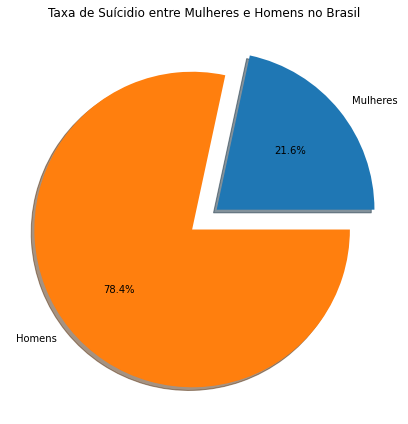

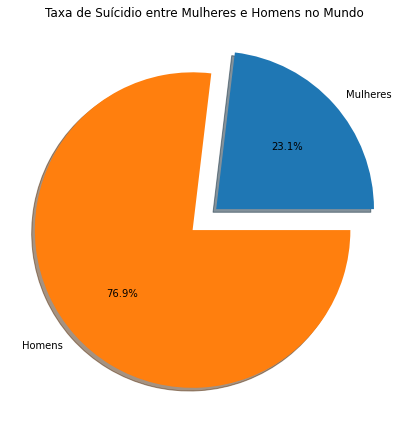

In [21]:
#Vamos comparar aqui a % de suícidios por sexo no Brasil
#Agrupando a tabela sexo e faço a soma da quantidade de suícidios
homens_mulheres = df_brasil.groupby('sex').suicides_no.sum()

sizes = homens_mulheres
explode = (0.1, 0.1)

#Plotando o gráfico de pizza coma % de suícidio entre homens e mulheres no brasil
fig, ax = plt.subplots(figsize=(6,6))

ax.pie(sizes, labels=['Mulheres', 'Homens'], explode=explode, autopct='%1.1f%%', shadow=True)
ax.set_title("Taxa de Suícidio entre Mulheres e Homens no Brasil")

plt.tight_layout()

#Vamos fazer o mesmo plot do gráfico acima para comprar a % de suícidio entre o Brasil e mundo
#Agrupando a tabela sexo e faço a soma da quantidade de suícidios
homens_mulheres_world = df.groupby('sex').suicides_no.sum()

sizes_word = homens_mulheres_world
explode = (0.1, 0.1)

#plotar o gráfico de pizza
fig, ax = plt.subplots(figsize=(6,6))

ax.pie(sizes_word, labels=['Mulheres', 'Homens'], explode=explode, autopct='%1.1f%%', shadow=True)
ax.set_title("Taxa de Suícidio entre Mulheres e Homens no Mundo")

plt.tight_layout()


Podemos ver que há uma variação pequena entre a base do Brasil e do mundo, mas podemos perceber que em comum os homens são os que cometem mais suicidios que às mulher. Faz sentido, pois temos cuturalmente o homem tendendo a ser mais fechado a ajuda, mas as mulheres em grande maioria cuturalmente é mais aberta a isso. Podemos ver que devemos focar muito em quebrar essa cultura de que o homem tem que ser, como popularmente é falado, "homem macho" e que não pode ser aquela pessoa que não chora, que não se abre a ajuda e devemos concientizar de que somos todos humanos e que todos temos problemas e não precisamos passar por eles sozinhos.

# Conclusão

Infelizmente por falta de conhecimento, por medo principalmente por mitos religiosos, os transtornos mentais, principalmente depressão, não são tratados de forma correta.
Por isso devemos orientar, nos atentar aos [sintomas](https://revistagalileu.globo.com/Sociedade/noticia/2014/10/6-sinais-de-comportamento-suicida.html), ter cuidado ao falar com as pessoas, por isso é muito importante que caso não souber como falar ou agir nesta situação procure um profissional para ajudar a como saber se comunicar e principalmente não negue ao pedido de ajuda.

E claro sempre procure ajuda de um profissional de psicologia, psiquiatria ou o [CVV - Centro de valorização da Vida](https://www.cvv.org.br/).

Nós sentimos a sua falta!